## MNIST dataset
Using a Custom model of Convolutional NN


Import the dataset

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

(x_train, y_train), (x_test,y_test)= tf.keras.datasets.mnist.load_data(path="mnist.npz")

Explore and Prepare the data

In [6]:
def insight(data):
  print(f"Min: {data.min()}")
  print(f"Max: {data.max()}")
  print(f"Mean:{data.mean()} ")
  print("\n")

In [7]:
# Check the overall value of the dataset
insight1 = list(map(insight,(x_train,x_test)))
print(insight1)

Min: 0
Max: 255
Mean:33.318421449829934 


Min: 0
Max: 255
Mean:33.791224489795916 


[None, None]


Transformation

In [8]:
# Scale the inputs down to (0,1)
x_train = x_train.astype("float32") / x_train.max()
x_test = x_test.astype("float32") / x_test.max()

insight2 = list(map(insight,(x_train,x_test)))
print(insight2)

Min: 0.0
Max: 1.0
Mean:0.13066062331199646 


Min: 0.0
Max: 1.0
Mean:0.13251467049121857 


[None, None]


In [9]:
# from (60000,28,28) to (60000,28,28,1)
import numpy as np
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [10]:
# Number of samples in each set
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

60000 train samples
10000 test samples


In [11]:
# convert the labels from Integer class to Binary class (for crossentropy validation)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the CNN model


*   Sequential (feed-forward)
*   2 hidden layers of 32 and 64 filters of (3,3)
  -   Activation function: Rectify Linear Unit 
  -   Pooling (2,2): reduce the output size of each layer by 1/4


*   Dropout: decreases overfitting
*   Output layer: SoftMax Act.Fn.






In [12]:
input_shape = (28,28,1)
# Sequential : feed-forward CNN model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
     # Two CNN layers with 32/64 filters of 3x3 size and Pooling to reduce the size of output
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     # Flatten to 1D
        layers.Flatten(),
     # Set dropout rate to avoid overfitting
        layers.Dropout(0.5),
     # Output layer
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

### Compile & Train

*   Loss fn. = categorical_crossentropy
*   Optimizer = adam : Gradient Descent Algorithm
*   Output = accuracy



In [13]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 36s 84ms/step - loss: 0.7528 - accuracy: 0.7686 - val_loss: 0.0816 - val_accuracy: 0.9798
Epoch 2/15
422/422 [==============================] - 35s 83ms/step - loss: 0.1216 - accuracy: 0.9631 - val_loss: 0.0550 - val_accuracy: 0.9865
Epoch 3/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0865 - accuracy: 0.9742 - val_loss: 0.0473 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 35s 84ms/step - loss: 0.0689 - accuracy: 0.9777 - val_loss: 0.0426 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0630 - accuracy: 0.9808 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0538 - accuracy: 0.9830 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 35s 82ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0350 - val_accuracy:

Evaluate the model

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02675081230700016
Test accuracy: 0.9907000064849854


Visualise the results

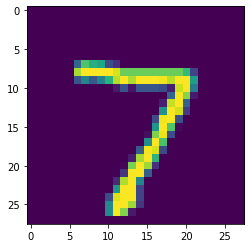

In [15]:
import matplotlib.pyplot as plt
x_test1, xtrain1 = map(np.squeeze,(x_test,x_train))
plt.imshow(x_test1[0])

Pick a number: 0


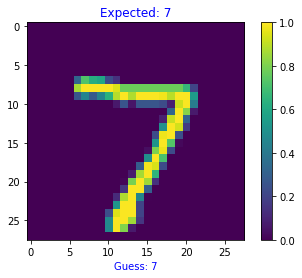

In [16]:
COLOR = 'Blue'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title(f"Expected: {label}")
  plt.xlabel(f"Guess: {guess}")
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = x_test1[num]
label = y_test[num]

class_names = ['0','1','2','3','4','5','6','7','8','9']
prediction = model.predict(np.array([x_test[num]]))
predicted_class = class_names[np.argmax(prediction)]

show_image(image, np.argmax(label), predicted_class)